In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..') # Add src to path
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE'
import h5py
import matplotlib.pyplot as plt

# Radar Nowcast Challenge

This notebook will describe the SEVIR radar nowcasting challenge.


## Python Environment

Running this notebook requires a python environment that includes the modules described here.


## Training and testing datasets

This section describes how to extract a training and testing dataset from SEIVR for radar nowcasting.  Make sure you're downloaded the full SEVIR dataset first.  We assume this data is located under `$SEVIR_ROOT`.

Under the directory `$SEVIR_ROOT/data/processed`, you'll see the training and testing datasets in hdf5 format called `radar_nowcast_training.h5` and `radar_nowcast_testing.h5`.  Insepcting these datasets with `h5ls`, you see the contents  






                       



In [9]:
!h5ls ../data/processed/nowcast_training.h5

IN_vil                   Dataset {44760/Inf, 384, 384, 13}
OUT_vil                  Dataset {44760/Inf, 384, 384, 12}


To create this dataset yourself (or to make modifications to the dataset), the command to generate these two files is

```
python make_dataset.py --input_types vil --output_types vil --sevir_data $SEVIR_ROOT/data/ --sevir_catalog $SEVIR_ROOT/CATALOG.csv --output_location ../data/processed/
```

## Examine samples in training dataset

The next cells will use the same generator used to create the training data set shown above, but will also provide metadata used for georeferencing and plotting

First create the training data generator:

In [34]:
import datetime
from make_dataset import NowcastGenerator,get_nowcast_train_generator
sevir_root='/home/gridsan/groups/EarthIntelligence/datasets/SEVIR'
sevir = get_nowcast_train_generator(sevir_catalog=sevir_root+'/CATALOG.csv',
                                   batch_size=8,
                                   sevir_location=sevir_root+'/data/',
                                   start_date=datetime.datetime(2019,6,1),
                                   end_date=datetime.datetime(2019,7,1),
                                   shuffle=True)


Get a batch of `batch_size=8` image sequences

In [ ]:
batch_idx = 2 # between 0 and len(sevir)
(X,Y),meta=sevir.get_batch(batch_idx,return_meta=True)
print('Input X:',X[0].shape)
print('Output Y:',Y[0].shape)

In [ ]:
%%capture off 
from matplotlib.animation import FuncAnimation
from src.display.cartopy import make_animation
anim = make_animation(X[0],meta.iloc[0])
anim.save('my_animation.gif', writer='imagemagick', fps=6)

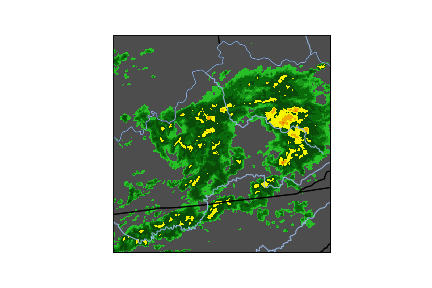

In [59]:
Image('my_animation.gif')

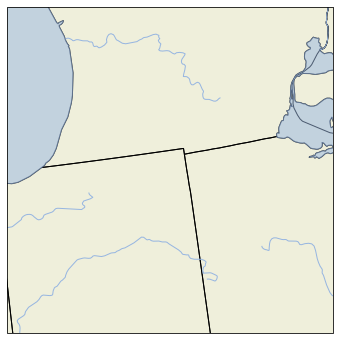

In [11]:
import cartopy.feature as cfeature
from src.display.cartopy import make_ccrs

proj,img_extent = make_ccrs(meta.iloc[0])
plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1,projection=proj)
ax.set_xlim((img_extent[0],img_extent[1]))
ax.set_ylim((img_extent[2],img_extent[3]))

ax.imshow()

ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS )
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

In [19]:
meta

,time_utc,episode_id,event_id,event_type,minute_offsets,llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon,proj,height_m,width_m
19811,2019-06-01 20:45:00,139402.0,838535.0,Hail,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,40.068882,-87.605464,42.982287,-82.340938,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
23756,2019-06-15 04:59:00,NaN,NaN,NaN,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,41.467638,-104.858947,45.095828,-100.378147,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
19494,2019-06-24 19:50:00,138726.0,834291.0,Thunderstorm Wind,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,37.098799,-80.677020,39.698140,-75.379702,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
19673,2019-06-04 21:32:00,139122.0,836773.0,Thunderstorm Wind,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,42.554861,-101.538966,46.058798,-96.784715,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
32128,2019-06-03 02:44:10,NaN,NaN,NaN,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,29.795618,-104.736681,33.421054,-100.875212,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
28785,2019-06-25 22:48:00,NaN,NaN,NaN,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,29.775354,-88.824691,32.793231,-84.362578,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
32490,2019-06-07 17:10:50,NaN,NaN,NaN,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,29.383901,-87.463377,32.345916,-82.975881,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
28751,2019-06-26 00:48:00,NaN,NaN,NaN,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,29.399560,-94.694893,32.658589,-90.466454,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
19811,2019-06-01 20:45:00,139402.0,838535.0,Hail,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,40.068882,-87.605464,42.982287,-82.340938,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0
23756,2019-06-15 04:59:00,NaN,NaN,NaN,-60:-55:-50:-45:-40:-35:-30:-25:-20:-15:-10:-5...,41.467638,-104.858947,45.095828,-100.378147,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384000.0,384000.0


## Examine training data

Here we load some samples of the training data and visualize it


In [12]:
training_file = '../data/processed/nowcast_training.h5'
idx = 1234 # a sample index
with h5py.File(training_file,'r') as hf:
    sample = hf['IN_vil'][idx]

In [ ]:
from src.display

In [91]:
from src.generator import SEVIRGenerator
import datetime
sevir_root='/home/gridsan/groups/EarthIntelligence/datasets/SEVIR'
sevir = SEVIRGenerator(x_img_types=['vil'], y_img_types=None,  
                       catalog=sevir_root+'/CATALOG.csv',
                       sevir_data_home=sevir_root+'/data/',
                       start_date=datetime.datetime(2019,6,1),
                       end_date=datetime.datetime(2019,7,1),
                       shuffle=True)